<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; padding: 10px;">
    <b>Project Description</b><br>

This project focuses on analyzing ride-sharing data for Zuber, a new ride-sharing company launching in Chicago. The primary goal is to uncover patterns in passenger preferences and assess the influence of external factors, particularly weather conditions, on ride frequency. 
In the first part of the project I will conduct an exploratory data analysis (EDA) using two datasets related to taxi rides in Chicago. The goal is to understand the distribution of rides across different taxi companies and identify the neighborhoods with the highest drop-off rates.
In the second part of the project I will conduct a hypothesis testing to determine if the average duration of rides from the Loop to O'Hare International Airport varies on rainy Saturdays.</div>

## Project Step 1: Explanatory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
# this csvfile is from a previous query in part1 step 1 of Sprint 6 project 
# this query extracted trips amounts by company name for Nov 15-16,2017
rides_count = pd.read_csv('/datasets/project_sql_result_01.csv')
rides_count.info()
display(rides_count.head())
description = rides_count['trips_amount'].describe().round(2)
print(description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


count       64.00
mean      2145.48
std       3812.31
min          2.00
25%         20.75
50%        178.50
75%       2106.50
max      19558.00
Name: trips_amount, dtype: float64


In [3]:
#additional file provided the average number of rides ending in each neighborhood in NOV 2017
average_rides = pd.read_csv('/datasets/project_sql_result_04.csv') 
average_rides.info()
display(average_rides.head())
display(average_rides.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [4]:
average_rides['average_trips'] = average_rides['average_trips'].round(2).astype(float)
average_rides.info()
display(average_rides.head())
description = average_rides['average_trips'].describe().round(2)
print(description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90


count       94.00
mean       599.95
std       1714.59
min          1.80
25%         14.26
50%         52.02
75%        298.85
max      10727.47
Name: average_trips, dtype: float64


In [5]:
top10_average_rides = average_rides.sort_values(by='average_trips', ascending=False).head(10)
display(top10_average_rides)

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


In [6]:
# Checking for missing values
missing_values = rides_count.isnull().sum()
print("Missing values in rides_count DataFrame:\n", missing_values)

missing_values_average_rides = average_rides.isnull().sum()
print("\nMissing values in average_rides DataFrame:\n", missing_values_average_rides)

# Checking for duplicates
duplicates_rides_count = rides_count.duplicated().sum()
print("\nDuplicates in rides_count DataFrame:", duplicates_rides_count)

duplicates_average_rides = average_rides.duplicated().sum()
print("Duplicates in average_rides DataFrame:", duplicates_average_rides)

Missing values in rides_count DataFrame:
 company_name    0
trips_amount    0
dtype: int64

Missing values in average_rides DataFrame:
 dropoff_location_name    0
average_trips            0
dtype: int64

Duplicates in rides_count DataFrame: 0
Duplicates in average_rides DataFrame: 0


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; padding: 10px;">
    <b>Intermediate Conclusions</b><br>
   
 The checks for missing values and duplicates confirmed the integrity of the datasets, ensuring that the analysis is based on complete and accurate data. The descriptive statistics highlighted the variability in ride counts across different companies and neighborhoods. The mean and standard deviation of trips indicate that while some companies have a stable number of rides, others experience extreme variations.</div>

### Showing the number of rides taken by all taxi companies in Chicago on NOV15-16 2017

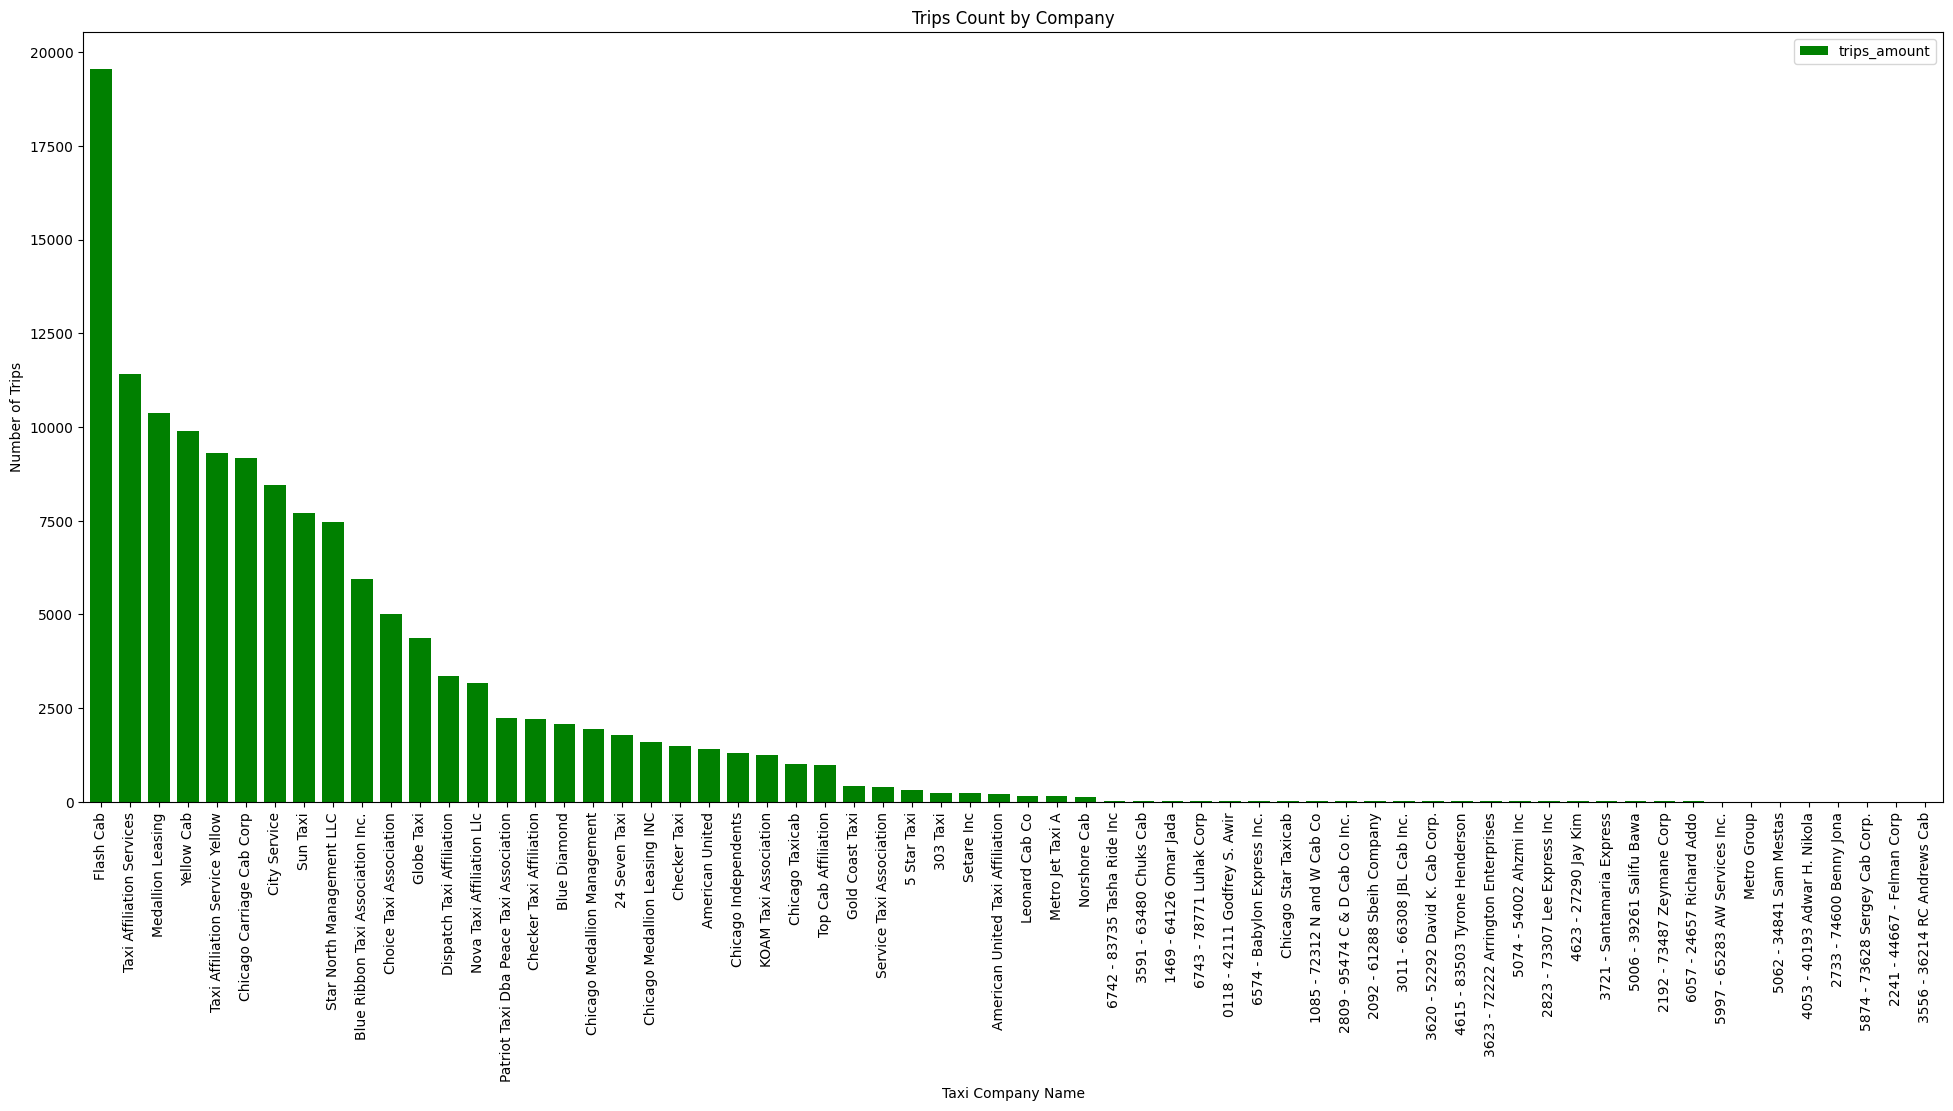

In [7]:
rides_count.plot(kind='bar', x='company_name', y= 'trips_amount', color = 'green', width = .75, figsize= (24,10))
plt.title('Trips Count by Company')
plt.xlabel('Taxi Company Name')
plt.ylabel('Number of Trips')
plt.show()

### Showing the average amount of rides by neighborhoods in Chicago in NOV 2017.

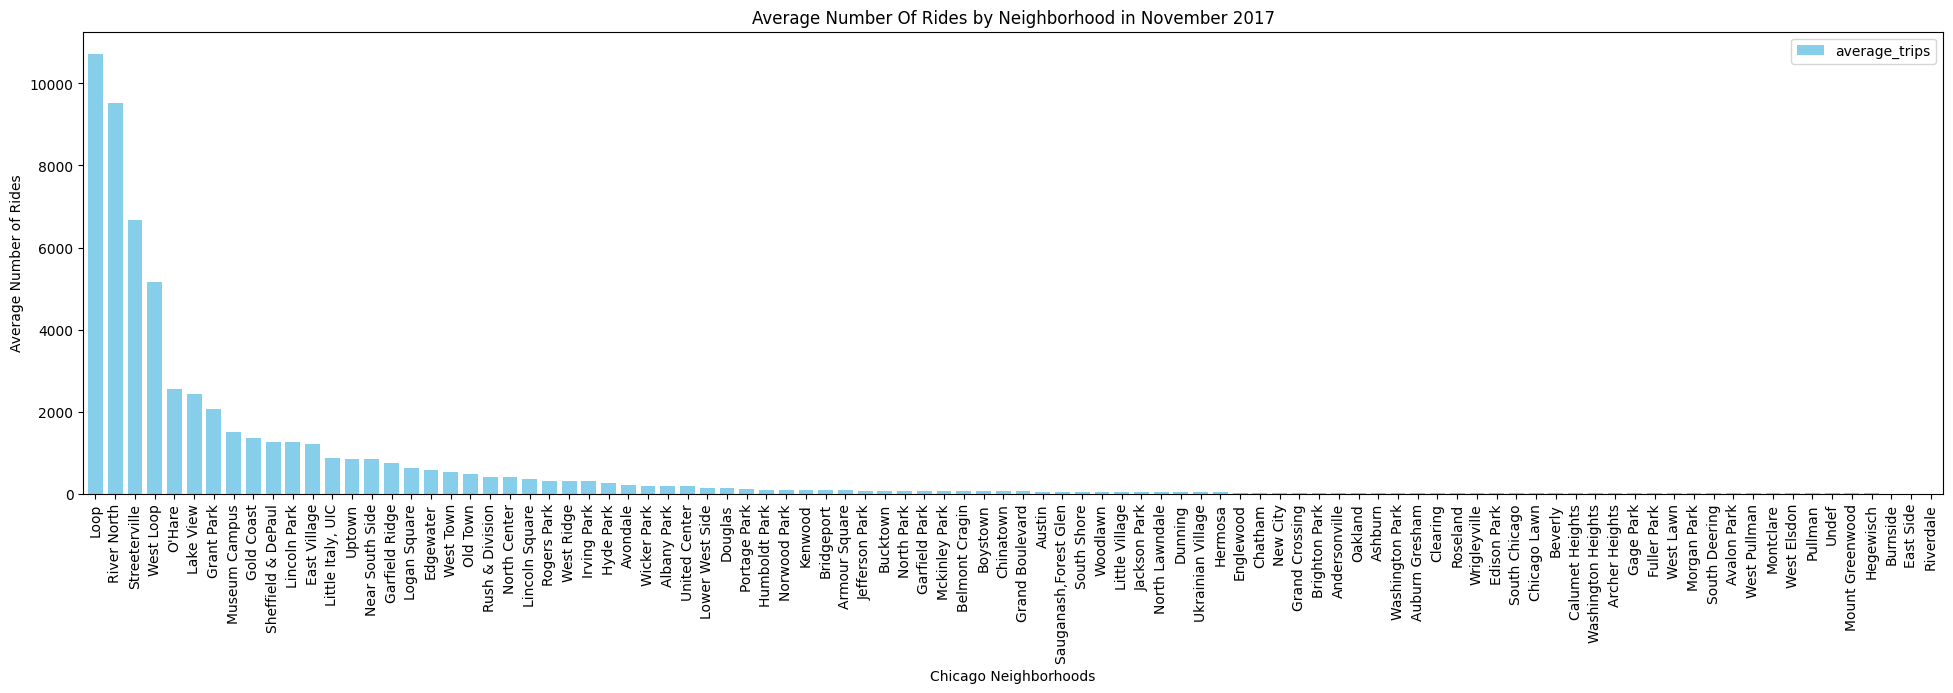

In [8]:
average_rides.plot(kind='bar', x='dropoff_location_name', y= 'average_trips', color = 'skyblue', width = .75, figsize= (24,6))
plt.title('Average Number Of Rides by Neighborhood in November 2017')
plt.xlabel('Chicago Neighborhoods')
plt.ylabel('Average Number of Rides')
plt.show()

### Showing the average amount of rides by top 10 neighborhoods in Chicago in NOV 2017.

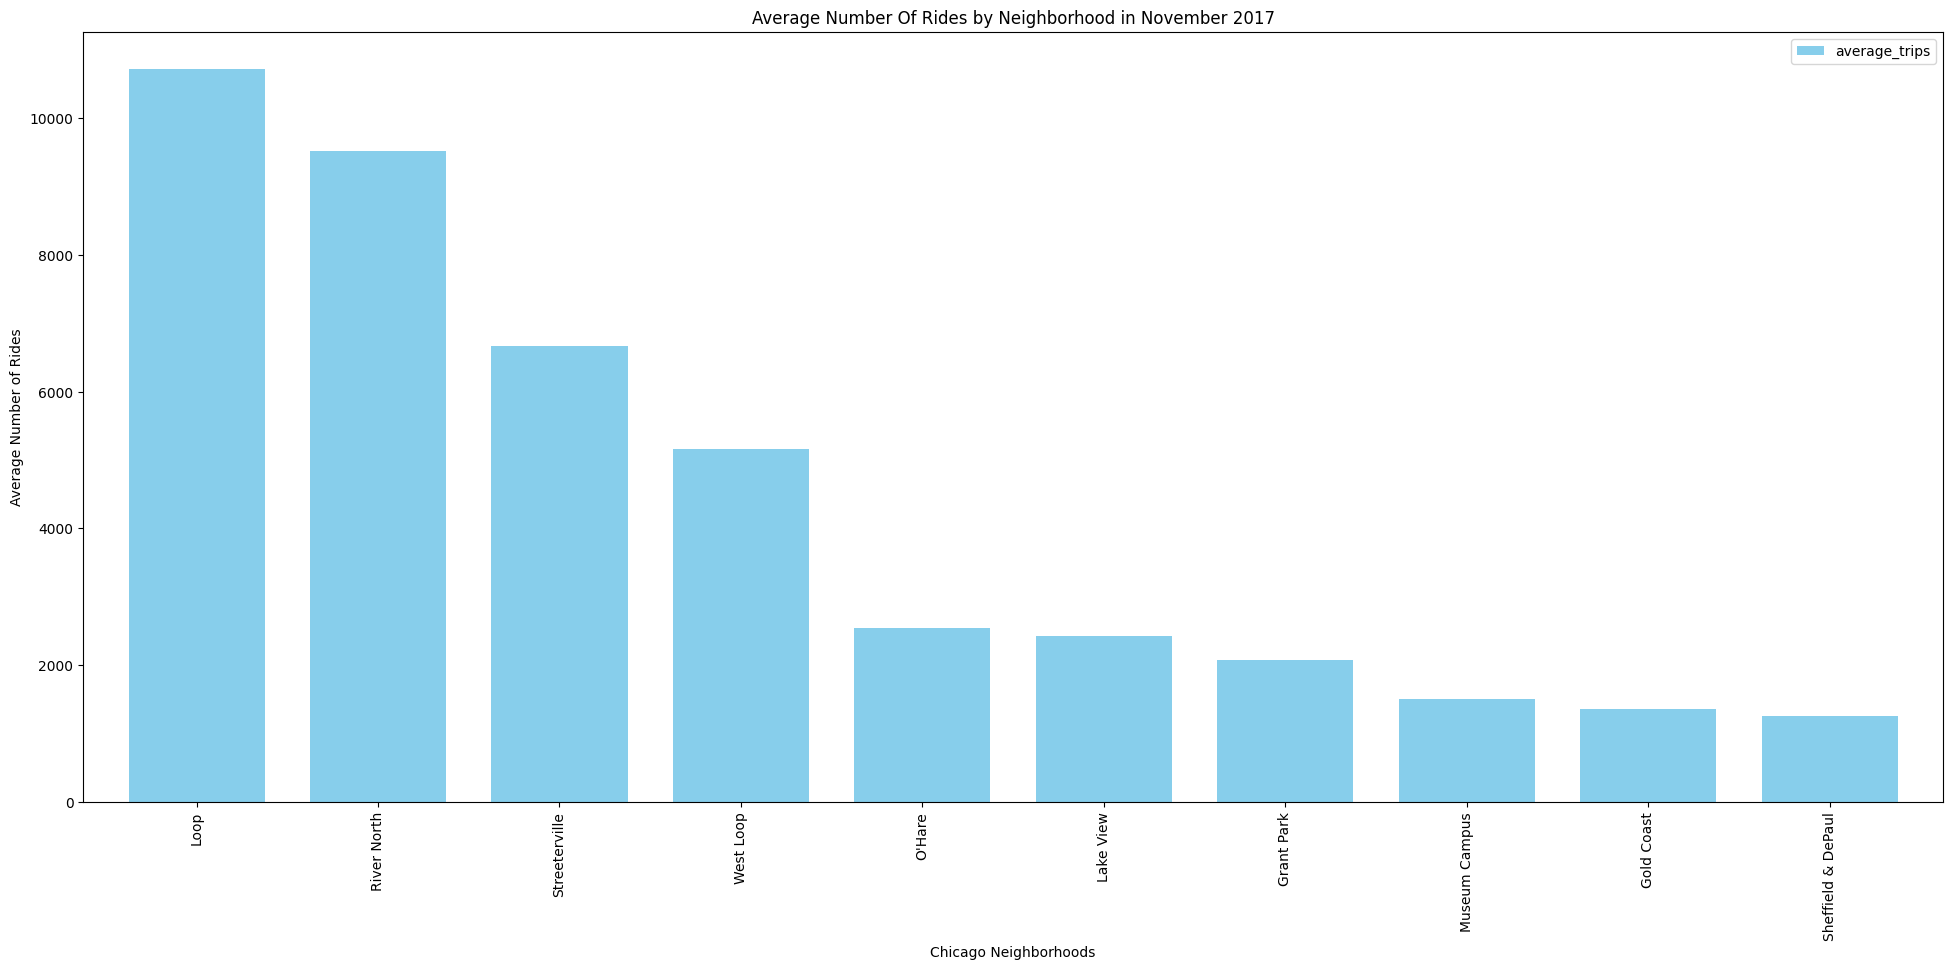

In [9]:
top10_average_rides.plot(kind='bar', x='dropoff_location_name', y= 'average_trips', color = 'skyblue', width = .75, figsize= (24,10))
plt.title('Average Number Of Rides by Neighborhood in November 2017')
plt.xlabel('Chicago Neighborhoods')
plt.ylabel('Average Number of Rides')
plt.show()

 #### Conclusions: The top 10 neighborhoods take up the majority of rides with insignificant amount of rides to all the other neighborhoods. This is also true for the top ten taxi companies who take up the majority of the total taxi rides.


## Project Step 2: Testing the hypothesys that The Average Duration of Rides from the Loop to the O'Hare International changes on rainy Saturdays


### Data Preparation

In [10]:
# as indicated in the project description this csv file just like the csv file "project_sql_01,csv" was created
# with an sql query of the table trip in previous steps of the project more exactly step3 task 3 and includes data for NOV 2017
loop_to_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')
display(loop_to_ohare.info())
display(loop_to_ohare.head())
display (loop_to_ohare.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [11]:
# changing datatype for the start_ts column
loop_to_ohare['start_ts'] = pd.to_datetime(loop_to_ohare['start_ts'])
display(loop_to_ohare.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


None

### Data Filtering

In [12]:
# Extracting dayofweek from start_ts column
loop_to_ohare['day']= loop_to_ohare['start_ts'].dt.dayofweek
display(loop_to_ohare.head(25))
#Question for reviwer: should not this code show all days of the week? 
#I do not understand why it only shows Saturdays. What am I doing wrong?

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
5,2017-11-11 04:00:00,Good,1320.0,5
6,2017-11-04 16:00:00,Bad,2969.0,5
7,2017-11-18 11:00:00,Good,2280.0,5
8,2017-11-11 14:00:00,Good,2460.0,5
9,2017-11-11 12:00:00,Good,2040.0,5


In [13]:
#Extracting Saturdays from start_ts column
all_saturdays = loop_to_ohare[loop_to_ohare['day'] ==5]
display(all_saturdays.head(25))

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
5,2017-11-11 04:00:00,Good,1320.0,5
6,2017-11-04 16:00:00,Bad,2969.0,5
7,2017-11-18 11:00:00,Good,2280.0,5
8,2017-11-11 14:00:00,Good,2460.0,5
9,2017-11-11 12:00:00,Good,2040.0,5


In [14]:
#Extracting Saturdays with Good Weather Conditions from start_ts and weather_conditions columns
sunny_saturdays = loop_to_ohare[(loop_to_ohare['day']==5) & (loop_to_ohare['weather_conditions']=='Good')]
display(sunny_saturdays.head(25))

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
5,2017-11-11 04:00:00,Good,1320.0,5
7,2017-11-18 11:00:00,Good,2280.0,5
8,2017-11-11 14:00:00,Good,2460.0,5
9,2017-11-11 12:00:00,Good,2040.0,5
10,2017-11-18 06:00:00,Good,1500.0,5


In [15]:
#Extracting Saturdays with Bad Weather Conditions from start_ts and weather_conditions columns
rainy_saturdays = loop_to_ohare[(loop_to_ohare['day']==5) & (loop_to_ohare['weather_conditions']=='Bad')]
display(rainy_saturdays.head(25))

,start_ts,weather_conditions,duration_seconds,day
6,2017-11-04 16:00:00,Bad,2969.0,5
30,2017-11-18 12:00:00,Bad,1980.0,5
34,2017-11-04 17:00:00,Bad,2460.0,5
51,2017-11-04 16:00:00,Bad,2760.0,5
52,2017-11-18 12:00:00,Bad,2460.0,5
54,2017-11-18 10:00:00,Bad,1440.0,5
65,2017-11-04 18:00:00,Bad,2363.0,5
70,2017-11-18 16:00:00,Bad,3000.0,5
78,2017-11-04 16:00:00,Bad,3120.0,5
92,2017-11-18 07:00:00,Bad,1511.0,5


### Statistical Analysis

In [16]:
#calculating the mean of ride duration on rainy Saturdays
average_duration_rainy_saturdays= rainy_saturdays['duration_seconds'].mean().round(2)
print(f'Average Ride Duration on Rainy Satudays: {average_duration_rainy_saturdays} seconds')
#calculating the mean of ride duration on all Saturdays.
avarage_duration_sunny_saturdays = sunny_saturdays ['duration_seconds'].mean().round(2)
print(f'Average Ride Duration on Sunny Satudays: {avarage_duration_sunny_saturdays}seconds')

Average Ride Duration on Rainy Satudays: 2427.21 seconds
Average Ride Duration on Sunny Satudays: 1999.68seconds


### Calculating the t-statistic and p_value

In [17]:
t_stat, p_value = stats.ttest_ind(rainy_saturdays['duration_seconds'], sunny_saturdays['duration_seconds'], equal_var=False)

print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: 7.186034288068629, p-value: 6.738994326108734e-12


### Formulating the hypotheses: 
H0 or the null hypothesys = the average duration of rides from the Loop to O'Hare does not change on rainy Saturdays | H1 or the alternative hypothesys = the average duration of rides from the Loop to the O'Hare International Airport changes on rainy Saturdays¶. I am choosing the significance value alpha = .05 The p-value = 5.013652852599471e-09. The p-value is significantly lower then alpha, we can reject the null hypothesis. The average ride duration on rainy Saturdays is significantly different from sunny Saturdays.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; padding: 10px;">
    <b> Final Conclusion </b><br>
   
Zuber should use the data on ride frequency and weather conditions to allocate drivers more effectively during peak times. Increase the number of available drivers during forecasted bad weather conditions to meet higher demand and reduce wait times. They could also consider implementing surge pricing during rainy conditions, as ride demand tends to increase. This can help manage supply and demand effectively while also increasing revenue. 
Also, monitoring the wethaer and sending notifications to customers about potential delays during rainy weather along with suggesting alternative routes or ride-sharing options could be implemented.</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 2</b>

Well done, Maria!!!